In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../01_intro/laptops.csv')

In [3]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
df = df[['ram', 'storage', 'screen', 'final_price']]

In [6]:
df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='final_price', ylabel='Count'>

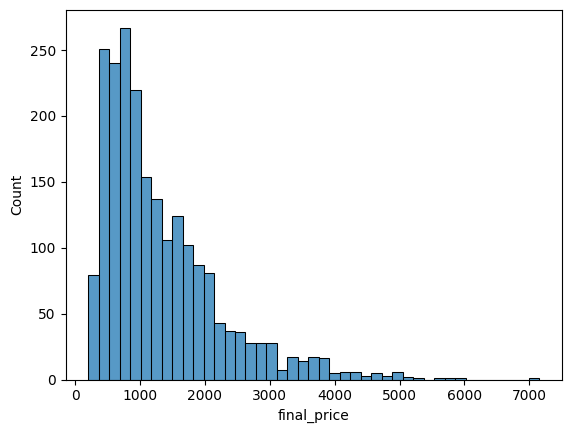

In [8]:
sns.histplot(df.final_price) #, bins=50)

In [9]:
# Question 1
# There's one column with missing values. What is it?

df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [10]:
# Question 2
# What's the median (50% percentile) for variable 'ram'?

p = np.percentile(df.ram, 50) 

In [11]:
p

16.0

Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.
Use the same code as in the lectures

In [12]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [13]:
n, n_val, n_test, n_train

(2160, 432, 432, 1296)

In [14]:
n_val + n_test + n_train

2160

In [15]:
idx = np.arange(n)

In [16]:
idx

array([   0,    1,    2, ..., 2157, 2158, 2159])

In [17]:
np.random.seed(42)
np.random.shuffle(idx)

In [18]:
idx

array([2079,  668, 2073, ..., 1130, 1294,  860])

In [77]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [78]:
df_train.head()

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00


In [79]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [80]:
df_train.head()

,ram,storage,screen,final_price
0,32,1000,15.6,1123.29
1,4,64,14.1,201.05
2,32,1000,14.0,997.74
3,16,512,13.3,1016.00
4,32,1000,16.0,2739.00


Question 3
* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

Options:

* With 0
* With mean
* Both are equally good

In [81]:
# Option 1
df_train_1 = df_train.copy()

In [25]:
df_train_1.screen = df_train_1.screen.fillna(0)

In [27]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [28]:
base = ['ram', 'storage', 'screen']

X_train_1 = df_train_1[base].values
y_train_1 = df_train_1.final_price.values

w0_1, w_1 = train_linear_regression(X_train_1, y_train_1)

y_pred_1 = w0_1 + X_train_1.dot(w_1)

In [29]:
w0_1, w_1

(676.8954853003689, array([ 43.70681555,   0.86506867, -36.10399833]))

<Axes: ylabel='Count'>

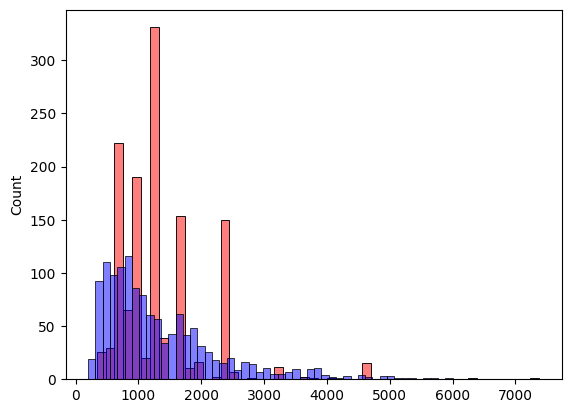

In [31]:
sns.histplot(y_pred_1, color='red', alpha=0.5, bins=50)
sns.histplot(y_train_1, color='blue', alpha=0.5, bins=50)

In [32]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [33]:
df_val_1 = df_val.copy()

In [34]:
df_val_1.isnull().sum()

ram            0
storage        0
screen         1
final_price    0
dtype: int64

In [35]:
df_val_1.screen = df_val_1.screen.fillna(0)

In [36]:
X_val_1 = df_val_1[base].values
y_val_1 = df_val_1.final_price.values

y_pred_1 = w0_1 + X_val_1.dot(w_1)
rmse(y_val_1, y_pred_1)

597.3635593619622

In [37]:
print("The result = {} when NaN filled with 0".format(round(rmse(y_val_1, y_pred_1), 2)))

The result = 597.36 when NaN filled with 0


In [48]:
# Option 2
df_train_2 = df_train.copy()

In [49]:
df_train_2.isnull().sum()

ram            0
storage        0
screen         3
final_price    0
dtype: int64

In [50]:
train_screen_mean = df_train_2.screen.mean()
df_train_2.screen = df_train_2.screen.fillna(train_screen_mean)

In [51]:
df_train_2.isnull().sum()

ram            0
storage        0
screen         0
final_price    0
dtype: int64

In [52]:
X_train_2 = df_train_2[base].values
y_train_2 = df_train_2.final_price.values

w0_2, w_2 = train_linear_regression(X_train_2, y_train_2)

y_pred_2 = w0_2 + X_train_2.dot(w_2)

In [53]:
w0_2, w_2

(808.915990733356, array([ 43.90774584,   0.87135236, -45.18273312]))

<Axes: ylabel='Count'>

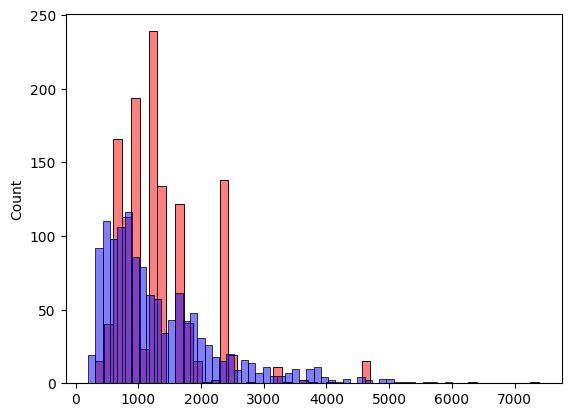

In [54]:
sns.histplot(y_pred_2, color='red', alpha=0.5, bins=50)
sns.histplot(y_train_2, color='blue', alpha=0.5, bins=50)

In [55]:
df_val_2 = df_val.copy()

In [56]:
df_val_2.isnull().sum()

ram            0
storage        0
screen         1
final_price    0
dtype: int64

In [57]:
df_val_2.screen = df_val_2.screen.fillna(train_screen_mean)

In [58]:
df_val_2.isnull().sum()

ram            0
storage        0
screen         0
final_price    0
dtype: int64

In [59]:
X_val_2 = df_val_2[base].values
y_val_2 = df_val_2.final_price.values

y_pred_2 = w0_2 + X_val_2.dot(w_2)
rmse(y_val_2, y_pred_2)

600.2650313748433

In [60]:
print("The result = {} when NaN filled with mean".format(round(rmse(y_val_2, y_pred_2), 2)))

The result = 600.27 when NaN filled with mean


Answer: filled with 0 gives better RMSE

Question 4
* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?

If there are multiple options, select the smallest r.

In [73]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [84]:
df_train_4 = df_train.copy()
df_val_4 = df_val.copy()

In [85]:
df_train_4 = df_train_4.fillna(0)
df_val_4 = df_val_4.fillna(0)

In [86]:
X_train_4 = df_train_4[base].values
y_train_4 = df_train_4.final_price.values

X_val_4 = df_val_4[base].values
y_val_4 = df_val_4.final_price.values

In [87]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0_4, w_4 = train_linear_regression_reg(X_train_4, y_train_4, r=r)

    y_pred_4 = w0_4 + X_val_4.dot(w_4)
    score_4 = rmse(y_val_4, y_pred_4)
    
    #print(r, w0, round(score, 2))
    print("r = {}, w0 = {}, RMSE = {}".format(r, w0_4, round(score_4, 2)))

r = 0, w0 = 676.8954853003689, RMSE = 597.36
r = 0.01, w0 = 676.2736817205739, RMSE = 597.36
r = 0.1, w0 = 670.7284836312828, RMSE = 597.35
r = 1, w0 = 619.9030834107573, RMSE = 597.21
r = 5, w0 = 463.7771697141752, RMSE = 597.01
r = 10, w0 = 352.7971336767456, RMSE = 597.06
r = 100, w0 = 66.92071440179805, RMSE = 597.9


Question 5
* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))

What's the value of std?

In [191]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [88]:
scores = []

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx = np.arange(n)    
    np.random.seed(s)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
    df_val = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
    df_test = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)

    df_train = df_train.fillna(0)
    df_val = df_val.fillna(0)
    df_test = df_test.fillna(0)

    X_train = df_train[base].values
    y_train = df_train.final_price.values
    w0, w = train_linear_regression(X_train, y_train)
    #y_pred = w0 + X_train.dot(w)
    
    X_val = df_val[base].values
    y_val = df_val.final_price.values
    y_pred = w0 + X_val.dot(w)
    rmse(y_val, y_pred)
    print(s, rmse(y_val, y_pred))

    scores.append(rmse(y_val, y_pred))

0 565.4520868771004
1 636.798542305673
2 588.9558697907955
3 597.8148920012511
4 571.9627915111033
5 573.2383256618967
6 647.3438328407198
7 550.4398184485973
8 587.3335036169941
9 576.1017929433127


In [89]:
np.std(scores)

29.176491258292177

In [90]:
# Answer:
round(np.std(scores), 3)

29.176

Question 6
* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

In [91]:
idx = np.arange(n)    
np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
df_val = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
df_test = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)

df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)

df_full_train = df_full_train.fillna(0)
df_test = df_test.fillna(0)

In [92]:
X_full_train = df_full_train[base].values
y_full_train = df_full_train.final_price.values

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [93]:
X_test = df_test[base].values
y_test = df_test.final_price.values

y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

608.6099822049564

In [94]:
# Answer:
round(score, 2)

608.61